In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Understand the dataset (5 points)

In [2]:
df=pd.read_csv('customer_sales.csv', encoding='latin-1')

In [3]:
df

,ï»¿Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
0,BN-2011-7407039,1/1/11,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,$45,-26.0,3.0
1,AZ-2011-9050313,1/3/11,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,$854,290.0,7.0
2,AZ-2011-6674300,1/4/11,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,$140,21.0,3.0
3,BN-2011-2819714,1/4/11,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,$27,-22.0,2.0
4,BN-2011-2819714,1/4/11,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,$17,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-766953,12/31/14,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,$245,91.0,2.0
8043,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,$30,-10.0,2.0
8044,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,$23,-6.0,4.0
8045,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,$108,-19.0,3.0


In [4]:
#1. Are there any missing values in the dataset? (0.5)

# Counting the missing values by column
df.isna().sum()

#Ans: There are some missing values in the dataset as given below

ï»¿Order ID       0
Order Date        6
Customer Name     1
Country           1
State             4
City              4
Region            0
Segment           1
Ship Mode         5
Category          5
Sub-Category      0
Product Name      0
Discount          7
Sales             2
Profit           13
Quantity         13
dtype: int64

In [5]:
# There are only 62 null values that is less than 1% of the dataset
# Hence dropping the null values
df=df.dropna()
df=df.drop_duplicates()
df.isna().sum()

ï»¿Order ID      0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
dtype: int64

In [6]:
df['Order Date']

0         1/1/11
1         1/3/11
2         1/4/11
3         1/4/11
4         1/4/11
          ...   
8042    12/31/14
8043    12/31/14
8044    12/31/14
8045    12/31/14
8046    12/31/14
Name: Order Date, Length: 8011, dtype: object

In [9]:
# 2. What is the range of dates in the dataset? (1.5)
df = df.copy()
df['Date'] = pd.to_datetime(df['Order Date'])
df['Date']
# The date range is from 2011-01-01 to 2014-12-31

0      2011-01-01
1      2011-01-03
2      2011-01-04
3      2011-01-04
4      2011-01-04
          ...    
8042   2014-12-31
8043   2014-12-31
8044   2014-12-31
8045   2014-12-31
8046   2014-12-31
Name: Date, Length: 8011, dtype: datetime64[ns]

In [10]:
#3. How many unique customers are there in the dataset? (0.5)

df['Customer Name'].describe()
unique_customers = df['Customer Name'].nunique() 
print(unique_customers)

# There are 792 unique customers

792


In [23]:
#4. How many unique orders are there in the dataset? (0.5)

df['ï»¿Order ID'].describe()

# There are 4117 unique orders

count                8011
unique               4103
top       AZ-2014-7040665
freq                   11
Name: ï»¿Order ID, dtype: object

In [11]:
# 5. Profile the data to give the standard descriptive statistics for the Sales field. 
#What are the min, max, variance, and standard deviations? (0.5)

df['Sales Num'] = df['Sales'].str.replace('[\$,]','',regex=True).astype(float)
df['Sales Num'].describe()


count      8011.000000
mean        342.901760
std        3224.509472
min        -110.000000
25%          48.500000
50%         117.000000
75%         314.500000
max      206000.000000
Name: Sales Num, dtype: float64

In [12]:
df=df.sort_values(by='Sales Num', ascending= True)
df

,ï»¿Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Sales Num
180,BN-2011-1399750,3/15/11,Wanda Wingert,United Kingdom,England,London,North,Consumer,Immediate,Office Supplies,Art,"Binney & Smith Pens, Blue",0.1,-$110,4.0,1.0,2011-03-15,-110.0
7327,AZ-2014-6494772,10/16/14,Kian Sykes,France,Provence-Alpes-CÃ´te d'Azur,Carpentras,Central,Consumer,Priority,Office Supplies,Art,"Stanley Markers, Fluorescent",0.0,-$70,24.0,3.0,2014-10-16,-70.0
7328,AZ-2014-6494772,10/16/14,Kian Sykes,France,Provence-Alpes-CÃ´te d'Azur,Carpentras,Central,Consumer,Priority,Office Supplies,Binders,"Cardinal Index Tab, Clear",0.0,-$47,20.0,7.0,2014-10-16,-47.0
381,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,$0,0.0,1.0,2011-05-19,0.0
2162,BN-2012-8400051,6/29/12,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,$3,-1.0,1.0,2012-06-29,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,"$5,729",64.0,14.0,2014-11-19,5729.0
3196,AZ-2012-9218935,12/13/12,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,"$5,785",405.0,9.0,2012-12-13,5785.0
868,AZ-2011-5313166,9/8/11,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",0.0,"$6,517",2476.0,12.0,2011-09-08,6517.0
28,BN-2011-4913858,1/13/11,Julian Dobie,Netherlands,South Holland,Dordrecht,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.5,"$198,000",-131.0,2.0,2011-01-13,198000.0


In [13]:
# Remove rows with negative values in the 'Amount' column
df = df[df['Sales Num'] >= 0]
df

,ï»¿Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Sales Num
381,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,$0,0.0,1.0,2011-05-19,0.0
2162,BN-2012-8400051,6/29/12,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,$3,-1.0,1.0,2012-06-29,3.0
7097,BN-2014-5531507,9/15/14,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,$4,-3.0,1.0,2014-09-15,4.0
3388,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,$4,0.0,1.0,2013-01-14,4.0
1185,BN-2011-5491702,11/16/11,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,$4,-2.0,1.0,2011-11-16,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,"$5,729",64.0,14.0,2014-11-19,5729.0
3196,AZ-2012-9218935,12/13/12,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,"$5,785",405.0,9.0,2012-12-13,5785.0
868,AZ-2011-5313166,9/8/11,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",0.0,"$6,517",2476.0,12.0,2011-09-08,6517.0
28,BN-2011-4913858,1/13/11,Julian Dobie,Netherlands,South Holland,Dordrecht,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.5,"$198,000",-131.0,2.0,2011-01-13,198000.0


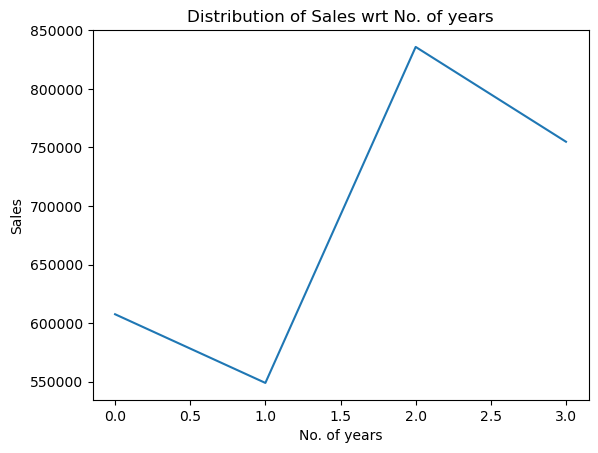

In [14]:
#6. Do transaction amounts (sales) in general increase over time (perhaps due to inflation)? (1.5)
df_con = df.groupby(df['Date'].dt.year)['Sales Num'].sum().reset_index()
plt.plot(df_con.index.values, df_con['Sales Num'])
plt.xlabel('No. of years')
plt.ylabel('Sales')
plt.title('Distribution of Sales wrt No. of years')
plt.show()

# Intially for the first year, a downward trend in the sales is observed.
# But after first year, there seems to be an upward trend in Sales till second year and then again a downward trend.
# It maybe due to inflation or increased demand.

# Step 2: Explore the dataset (4)

Text(0, 0.5, 'Date')

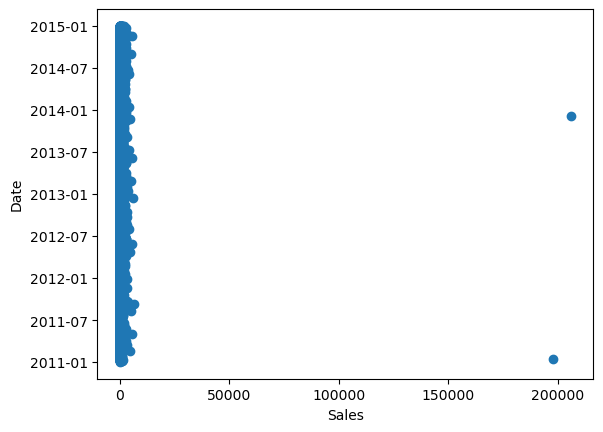

In [15]:
plt.scatter(df['Sales Num'], df['Date'])

# Add titles for axes
plt.xlabel('Sales')
plt.ylabel('Date')

#1. Are there any outliers? (2)
# Yes, there are 2 outliers

Mean: 343.05856643356645, Median: 117.0


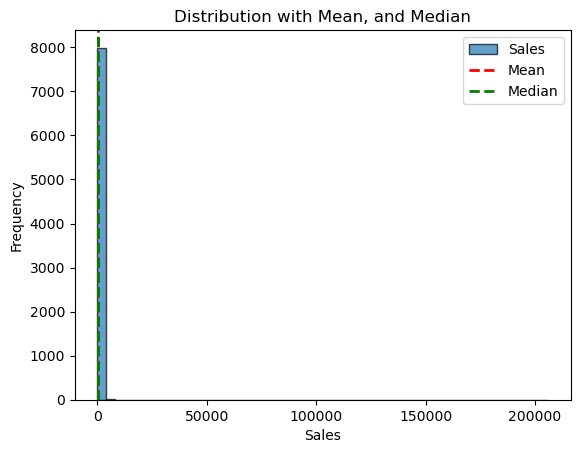

In [29]:

mean = df['Sales Num'].mean()
median = df['Sales Num'].median()

# Display statistics
print(f"Mean: {mean}, Median: {median}")

# Create a histogram using Matplotlib
plt.hist(df['Sales Num'], bins=50, edgecolor='black', alpha=0.7, label='Sales')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Median')

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution with Mean, and Median')
plt.legend()
plt.show()

In [16]:
#2. If so, how would you treat them? (2)
# By removing last highest 2 values of sales
df=df.sort_values(by= 'Sales Num')
df = df.iloc[:-2]
df['Sales Num'].describe()
# Now the following looks okay

count    8006.000000
mean      292.682113
std       487.158758
min         0.000000
25%        49.000000
50%       117.000000
75%       314.000000
max      6517.000000
Name: Sales Num, dtype: float64

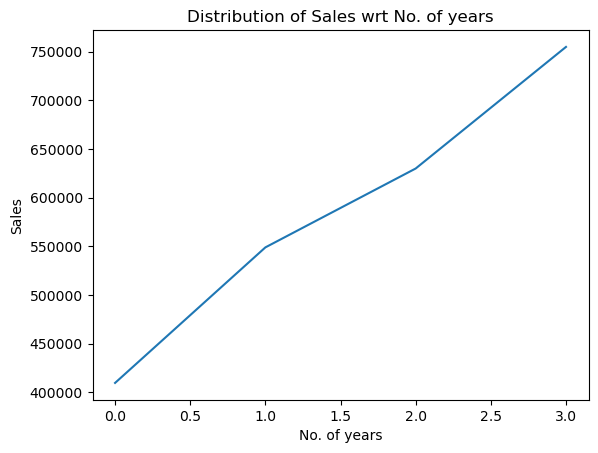

In [17]:
df_con = df.groupby(df['Date'].dt.year)['Sales Num'].sum().reset_index()
plt.plot(df_con.index.values, df_con['Sales Num'])
plt.xlabel('No. of years')
plt.ylabel('Sales')
plt.title('Distribution of Sales wrt No. of years')
plt.show()

# After dropping the outliers, and increasing trend in the sales is observed.

# Step 2.5: Finding the best region-category combo (5)

In [18]:
# Overall top and bottom 3 cities for sales
top_cities_sales = df.groupby('City')['Sales Num'].sum().nlargest(3)
bottom_cities_sales = df.groupby('City')['Sales Num'].sum().nsmallest(3)
top_cities_profits = df.groupby('City')['Profit'].sum().nlargest(3)
bottom_cities_profits = df.groupby('City')['Profit'].sum().nsmallest(3)
print(f"Top 3 cities by sales: \n{top_cities_sales}")
print(f"Bottom 3 cities by sales: \n{bottom_cities_sales}")
print(f"Top 3 cities by profit: \n{top_cities_profits}")
print(f"Bottom 3 cities by profit: \n{bottom_cities_profits}")

# Overall top and bottom 3 states for sales
top_states_sales = df.groupby('State')['Sales Num'].sum().nlargest(3)
bottom_states_sales = df.groupby('State')['Sales Num'].sum().nsmallest(3)
top_states_profits = df.groupby('State')['Profit'].sum().nlargest(3)
bottom_states_profits = df.groupby('State')['Profit'].sum().nsmallest(3)
print(f"Top 3 states by sales: \n{top_states_sales}")
print(f"Bottom 3 states by sales: \n{bottom_states_sales}")
print(f"Top 3 states by profit: \n{top_states_profits}")
print(f"Bottom 3 states by profit: \n{bottom_states_profits}")

Top 3 cities by sales: 
City
London    69219.0
Berlin    52555.0
Vienna    51830.0
Name: Sales Num, dtype: float64
Bottom 3 cities by sales: 
City
Osny              5.0
Aix-les-Bains    10.0
Sorgues          14.0
Name: Sales Num, dtype: float64
Top 3 cities by profit: 
City
London    13927.0
Vienna    13200.0
Madrid    11025.0
Name: Profit, dtype: float64
Bottom 3 cities by profit: 
City
Stockholm   -11616.0
Toulouse     -9675.0
Hanover      -6130.0
Name: Profit, dtype: float64
Top 3 states by sales: 
State
England                   378449.0
Ile-de-France             230074.0
North Rhine-Westphalia    170036.0
Name: Sales Num, dtype: float64
Bottom 3 states by sales: 
State
Central Jutland    34.0
St. Gallen         62.0
Basilicata         86.0
Name: Sales Num, dtype: float64
Top 3 states by profit: 
State
England                   79094.0
North Rhine-Westphalia    32495.0
Ile-de-France             29433.0
Name: Profit, dtype: float64
Bottom 3 states by profit: 
State
Stockholm       -

In [19]:
# #1. What are the top and bottom three cities, and states for sales and profits, overall, and for each year? (.5)

# Top 3 cities by sales: 
# City
# London    69219.0
# Berlin    52555.0
# Vienna    51830.0
# Name: Sales Num, dtype: float64

# Bottom 3 cities by sales: 
# City
# Osny              5.0
# Aix-les-Bains    10.0
# Sorgues          14.0
# Name: Sales Num, dtype: float64

# Top 3 cities by profit: 
# City
# London    13927.0
# Vienna    13200.0
# Madrid    11053.0
# Name: Profit, dtype: float64

# Bottom 3 cities by profit: 
# City
# Stockholm   -11616.0
# Toulouse     -9675.0
# Hanover      -6130.0
# Name: Profit, dtype: float64

# Top 3 states by sales: 
# State
# England                   378449.0
# Ile-de-France             230074.0
# North Rhine-Westphalia    170036.0
# Name: Sales Num, dtype: float64

# Bottom 3 states by sales: 
# State
# Central Jutland    34.0
# St. Gallen         62.0
# Basilicata         86.0
# Name: Sales Num, dtype: float64

# Top 3 states by profit: 
# State
# England                   79094.0
# North Rhine-Westphalia    32495.0
# Ile-de-France             29433.0
# Name: Profit, dtype: float64

# Bottom 3 states by profit: 
# State
# Stockholm       -13791.0
# North Brabant   -10364.0
# South Holland    -6596.0
# Name: Profit, dtype: float64

In [20]:
df['Year'] = df['Date'].dt.year

In [21]:
# Overall top and bottom 3 cities for sales
top_cities_sales = df.groupby(['Year','City'])['Sales Num'].sum().groupby('Year', group_keys=False).nlargest(3)
bottom_cities_sales = df.groupby(['Year','City'])['Sales Num'].sum().groupby('Year', group_keys=False).nsmallest(3)
top_cities_profits = df.groupby(['Year','City'])['Profit'].sum().groupby('Year', group_keys=False).nlargest(3)
bottom_cities_profits = df.groupby(['Year','City'])['Profit'].sum().groupby('Year', group_keys=False).nsmallest(3)
print(f"Top 3 cities by sales: \n{top_cities_sales}")
print(f"Bottom 3 cities by sales: \n{bottom_cities_sales}")
print(f"Top 3 cities by profit: \n{top_cities_profits}")
print(f"Bottom 3 cities by profit: \n{bottom_cities_profits}")

# Overall top and bottom 3 states for sales
top_states_sales = df.groupby(['Year','State'])['Sales Num'].sum().groupby('Year', group_keys=False).nlargest(3)
bottom_states_sales = df.groupby(['Year','State'])['Sales Num'].sum().groupby('Year', group_keys=False).nsmallest(3)
top_states_profits = df.groupby(['Year','State'])['Profit'].sum().groupby('Year', group_keys=False).nlargest(3)
bottom_states_profits = df.groupby(['Year','State'])['Profit'].sum().groupby('Year', group_keys=False).nsmallest(3)
print(f"Top 3 states by sales: \n{top_states_sales}")
print(f"Bottom 3 states by sales: \n{bottom_states_sales}")
print(f"Top 3 states by profit: \n{top_states_profits}")
print(f"Bottom 3 states by profit: \n{bottom_states_profits}")

Top 3 cities by sales: 
Year  City  
2011  London    18721.0
      Vienna    15520.0
      Berlin    12954.0
2012  London    21240.0
      Berlin    19048.0
      Vienna    12882.0
2013  Madrid    22153.0
      London    15301.0
      Rome      14492.0
2014  Paris     15459.0
      London    13957.0
      Berlin    11458.0
Name: Sales Num, dtype: float64
Bottom 3 cities by sales: 
Year  City         
2011  Chester          10.0
      Reus             10.0
      Quimper          13.0
2012  Solna             3.0
      Zeist             7.0
      Dresden          10.0
2013  Osny              5.0
      Carlisle         11.0
      Clichy           12.0
2014  Zwolle            6.0
      Puertollano       9.0
      Aix-les-Bains    10.0
Name: Sales Num, dtype: float64
Top 3 cities by profit: 
Year  City     
2011  London       4428.0
      Vienna       3707.0
      Lugo         2552.0
2012  London       4375.0
      Vienna       2771.0
      Luton        2664.0
2013  Madrid       6437.0
     

In [22]:
# Top 3 cities by sales: 
# Year  City  
# 2011  London    18721.0
#       Vienna    15520.0
#       Berlin    12954.0
# 2012  London    21240.0
#       Berlin    19048.0
#       Vienna    12882.0
# 2013  Madrid    22237.0
#       London    15301.0
#       Rome      14492.0
# 2014  Paris     15459.0
#       London    13957.0
#       Berlin    11458.0
# Name: Sales Num, dtype: float64

# Bottom 3 cities by sales: 
# Year  City         
# 2011  Chester          10.0
#       Reus             10.0
#       Quimper          13.0
# 2012  Solna             3.0
#       Zeist             7.0
#       Dresden          10.0
# 2013  Osny              5.0
#       Carlisle         11.0
#       Clichy           12.0
# 2014  Zwolle            6.0
#       Puertollano       9.0
#       Aix-les-Bains    10.0
# Name: Sales Num, dtype: float64

# Top 3 cities by profit: 
# Year  City     
# 2011  London       4428.0
#       Vienna       3707.0
#       Lugo         2552.0
# 2012  London       4375.0
#       Vienna       2771.0
#       Luton        2664.0
# 2013  Madrid       6465.0
#       Edinburgh    3392.0
#       Vienna       2713.0
# 2014  Vienna       4009.0
#       London       2454.0
#       Burnley      2400.0
# Name: Profit, dtype: float64

# Bottom 3 cities by profit: 
# Year  City          
# 2011  Amsterdam        -1743.0
#       Toulouse         -1542.0
#       Dublin           -1306.0
# 2012  Toulouse         -3833.0
#       Hanover          -3788.0
#       Tilburg          -1962.0
# 2013  Lisbon           -3408.0
#       Stockholm        -3143.0
#       Bergen op Zoom   -2773.0
# 2014  Stockholm        -6643.0
#       Toulouse         -2253.0
#       Dublin           -2113.0
# Name: Profit, dtype: float64

# Top 3 states by sales: 
# Year  State                 
# 2011  England                    74357.0
#       North Rhine-Westphalia     38825.0
#       Ile-de-France              31679.0
# 2012  England                    94734.0
#       Ile-de-France              51019.0
#       North Rhine-Westphalia     48250.0
# 2013  England                    86542.0
#       Ile-de-France              77294.0
#       North Rhine-Westphalia     33174.0
# 2014  England                   122816.0
#       Ile-de-France              70082.0
#       North Rhine-Westphalia     49787.0
# Name: Sales Num, dtype: float64

# Bottom 3 states by sales: 
# Year  State          
# 2011  Basque Country     48.0
#       Utrecht            53.0
#       Abruzzi            85.0
# 2012  Gelderland         27.0
#       Upper Austria      27.0
#       Central Jutland    34.0
# 2013  Rogaland           41.0
#       Ceuta              46.0
#       Abruzzi            58.0
# 2014  Marche             26.0
#       Calabria           36.0
#       Friesland          42.0
# Name: Sales Num, dtype: float64

# Top 3 states by profit: 
# Year  State                 
# 2011  England                   17776.0
#       North Rhine-Westphalia     6396.0
#       Ile-de-France              3952.0
# 2012  England                   20478.0
#       North Rhine-Westphalia    10455.0
#       Ile-de-France              5576.0
# 2013  England                   17148.0
#       Ile-de-France             11684.0
#       North Rhine-Westphalia     7166.0
# 2014  England                   23692.0
#       North Rhine-Westphalia     8478.0
#       Ile-de-France              8221.0
# Name: Profit, dtype: float64

# Bottom 3 states by profit: 
# Year  State                               
# 2011  North Holland                          -2259.0
#       Dublin                                 -1306.0
#       Groningen                              -1289.0
# 2012  North Brabant                          -3001.0
#       Languedoc-Roussillon-Midi-PyrÃ©nÃ©es   -2804.0
#       Lower Saxony                           -2171.0
# 2013  North Brabant                          -4801.0
#       Lisboa                                 -4512.0
#       Stockholm                              -3199.0
# 2014  Stockholm                              -7825.0
#       South Holland                          -2425.0
#       North Brabant                          -2186.0
# Name: Profit, dtype: float64

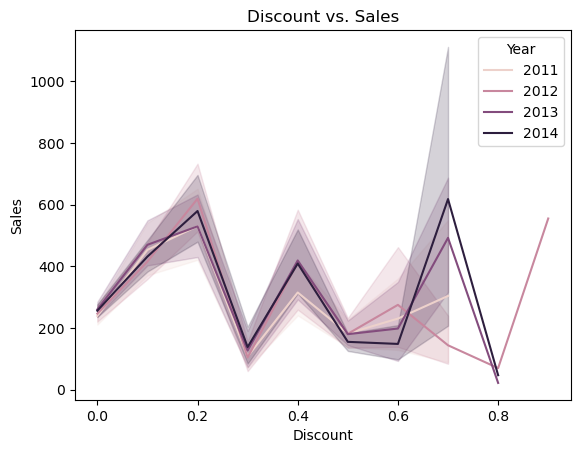

In [37]:
sns.lineplot(x = df['Discount'], y = df['Sales Num'], hue = df['Year'])
plt.title('Discount vs. Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

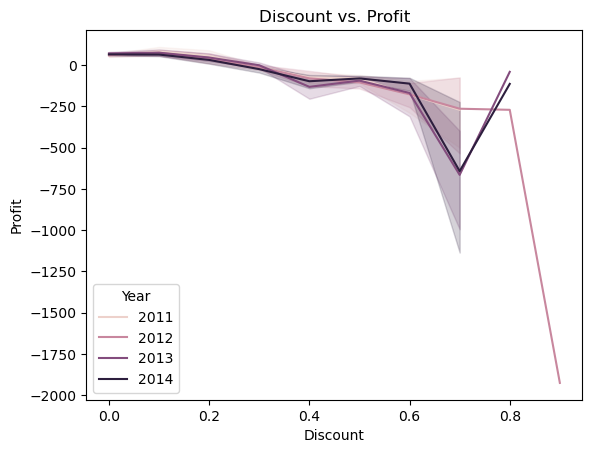

In [38]:
sns.lineplot(x = df['Discount'], y = df['Profit'], hue = df['Year'])
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

In [39]:
# 2. Does giving discounts increase sales and/or profits? Make a graph to show that. 
# Comment on what happens at 80% discount level, and what’s the optimum level for maximizing total profit. 
# Does the optimum change over years? (1)

# Answer: 
# There is no direct relation between increase in discount and increase in sales or profit as can be seen from the graph.
# At 80% discount level the profit starts to decrease drastically and sales startes to increase drastically.

# Analyze the impact of an 80% discount level
df_new=df.copy()
sales_impact_at_80= df_new.loc[df['Discount'] == 0.8].groupby(['Year'])['Sales Num'].mean()
print(f"Average Sales at 80% discount: \n{sales_impact_at_80}")
profit_impact_at_80= df_new.loc[df['Discount'] == 0.8].groupby(['Year'])['Profit'].mean()
print(f"Average Profit at 80% disount: \n{profit_impact_at_80}")


# Find the optimum discount level for maximizing total profit
optimum_discount = df_new.groupby('Year')['Profit'].idxmax()
print(optimum_discount)
optimum_discount_levels = df_new.loc[optimum_discount, ['Year', 'Discount']]

# Display the optimum discount levels by year
print("Optimum Discount Levels for Maximizing Total Profit:")
print(optimum_discount_levels)

# Check if the optimum discount level changes over the years
optimum_discount_changes = optimum_discount_levels['Discount'].diff()
print(optimum_discount_changes)

# The optimal discount value  does not change for the year for maximizing total profit.

Average Sales at 80% discount: 
Year
2012    70.0
2013    22.0
2014    47.0
Name: Sales Num, dtype: float64
Average Profit at 80% disount: 
Year
2012   -271.0
2013    -41.0
2014   -114.0
Name: Profit, dtype: float64
Year
2011     868
2012    1970
2013    4231
2014    5501
Name: Profit, dtype: int64
Optimum Discount Levels for Maximizing Total Profit:
      Year  Discount
868   2011       0.0
1970  2012       0.0
4231  2013       0.0
5501  2014       0.0
868     NaN
1970    0.0
4231    0.0
5501    0.0
Name: Discount, dtype: float64


In [23]:
#3. How do the different categories and sub-categories perform over time by region? 
# Comment on whether a category-subcategory combo is cyclical, increasing, decreasing for each region. (.5)
# Pivot table
pivot_table = df.pivot_table(index=['Region', 'Category', 'Sub-Category'], values='Sales Num', columns = 'Year', aggfunc='sum')
print(pivot_table)

# Calculate the differences between consecutive years for each combo
pivot_table_diff = pivot_table.diff(axis=1)

# Define a function to identify the trend type based on differences
def identify_trend(row):
    increasing = False
    decreasing = False
    for i in range(1, len(row)):
        if row.iloc[i] > 0:
            increasing = True
        elif row.iloc[i] < 0:
            decreasing = True

    if increasing and decreasing:
        return "Cyclical"
    elif increasing:
        return "Increasing"
    elif decreasing:
        return "Decreasing"
    else:
        return "Constant"

pivot_table_diff['Trend'] = pivot_table_diff.apply(identify_trend, axis=1)

df_final = pd.merge(pivot_table, pivot_table_diff['Trend'], on = ['Region','Category', 'Sub-Category'] )
print(df_final)

Year                                     2011     2012     2013     2014
Region  Category        Sub-Category                                    
Central Furniture       Bookcases     31488.0  38315.0  31683.0  46495.0
                        Chairs        29140.0  27503.0  37237.0  37817.0
                        Furnishings    6197.0   8961.0  12478.0  12201.0
                        Tables         4572.0  16251.0  14938.0  16216.0
        Office Supplies Appliances    22083.0  23272.0  27904.0  22844.0
                        Art           13717.0  15913.0  21262.0  21188.0
                        Binders        9629.0   8898.0  11705.0  15880.0
                        Envelopes      1588.0   4242.0   5571.0   3493.0
                        Fasteners      1949.0   2693.0   1727.0   2995.0
                        Labels         1336.0   1582.0   1863.0   1966.0
                        Paper          3854.0   2824.0   6015.0   5700.0
                        Storage       32989.0  3457

In [41]:
# Answer:
    
    
#                                            Trend  
# Region  Category        Sub-Category              
# Central Furniture       Bookcases       Cyclical  
#                         Chairs          Cyclical  
#                         Furnishings     Cyclical  
#                         Tables          Cyclical  
#         Office Supplies Appliances      Cyclical  
#                         Art             Cyclical  
#                         Binders         Cyclical  
#                         Envelopes       Cyclical  
#                         Fasteners       Cyclical  
#                         Labels        Increasing  
#                         Paper           Cyclical  
#                         Storage         Cyclical  
#                         Supplies        Cyclical  
#         Technology      Accessories   Increasing  
#                         Copiers       Increasing  
#                         Machines      Increasing  
#                         Phones        Increasing  
# North   Furniture       Bookcases       Cyclical  
#                         Chairs          Cyclical  
#                         Furnishings     Cyclical  
#                         Tables          Cyclical  
#         Office Supplies Appliances      Cyclical  
#                         Art             Cyclical  
#                         Binders         Cyclical  
#                         Envelopes     Increasing  
#                         Fasteners       Cyclical  
#                         Labels          Cyclical  
#                         Paper           Cyclical  
#                         Storage       Increasing  
#                         Supplies        Cyclical  
#         Technology      Accessories     Cyclical  
#                         Copiers       Increasing  
#                         Machines        Cyclical  
#                         Phones          Cyclical  
# South   Furniture       Bookcases     Increasing  
#                         Chairs          Cyclical  
#                         Furnishings   Increasing  
#                         Tables          Cyclical  
#         Office Supplies Appliances      Cyclical  
#                         Art           Increasing  
#                         Binders         Cyclical  
#                         Envelopes       Cyclical  
#                         Fasteners       Cyclical  
#                         Labels          Cyclical  
#                         Paper           Cyclical  
#                         Storage       Increasing  
#                         Supplies        Cyclical  
#         Technology      Accessories     Cyclical  
#                         Copiers       Increasing  
#                         Machines        Cyclical  
#                         Phones          Cyclical  


# Best region-category combos are the ones where we observe and increasing trend

In [42]:
from ydata_profiling import ProfileReport
ProfileReport(df)

# As can be seen from the heatmap Sales has a strong correlation with the profit

/Users/gupta/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/gupta/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
top_region = df.groupby(['Region'])['Sales Num'].sum()
print(top_region)
top_Category = df.groupby(['Category'])['Sales Num'].sum().sort_values(ascending=False)
print(top_Category)
cc = df[['Sales Num', 'Profit', 'Discount', 'Quantity']].corr()
print(cc)

Region
Central    1311592.0
North       515125.0
South       516496.0
Name: Sales Num, dtype: float64
Category
Technology         879996.0
Office Supplies    824936.0
Furniture          638281.0
Name: Sales Num, dtype: float64
           Sales Num    Profit  Discount  Quantity
Sales Num   1.000000  0.434421 -0.016853  0.351737
Profit      0.434421  1.000000 -0.353422  0.096986
Discount   -0.016853 -0.353422  1.000000  0.004626
Quantity    0.351737  0.096986  0.004626  1.000000


In [44]:
# 4. What factors affect the sales the most? You can run a simple regression to understand the impact. (.5)
# The Pearson correlation coefficient is an indicator of the extent and strength of the linear relationship
# between the two variables.

# For Sales vs Discount: -0.016287
# For Sales vs Quantity: 0.351322 
# For Sales vs Profit: 0.434418

#From all the above analysis it can be said that city, region, category affect the sales and profit is most correlated to sales 

# Step 3: Determine origin year of customers (1)

In [45]:
# Need to identify the first year the customer made a transaction
dfEarlyOrder = df.groupby('Customer Name')['Year'].min()
dfEarlyOrder = dfEarlyOrder.reset_index()
dfEarlyOrder

,Customer Name,Year
0,Aaron Bootman,2011
1,Aaron Cunningham,2011
2,Aaron Davey,2011
3,Aaron Macrossan,2011
4,Abbie Perry,2011
...,...,...
787,Zara Loton,2013
788,Zara Money,2011
789,Zoe Lanigan,2011
790,Zoe Lowin,2011


In [46]:
df_final = pd.merge(df, dfEarlyOrder, on = 'Customer Name', how = 'left')
df_final.rename(columns = {'Year_y': 'OriginYear'}, inplace = True)
df_final

,ï»¿Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Sales Num,Year_x,OriginYear
0,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,$0,0.0,1.0,2011-05-19,0.0,2011,2011
1,BN-2012-8400051,6/29/12,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,$3,-1.0,1.0,2012-06-29,3.0,2012,2012
2,BN-2014-5531507,9/15/14,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,$4,-3.0,1.0,2014-09-15,4.0,2014,2011
3,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,$4,0.0,1.0,2013-01-14,4.0,2013,2011
4,BN-2011-5491702,11/16/11,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,$4,-2.0,1.0,2011-11-16,4.0,2011,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8001,AZ-2012-5752966,5/29/12,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,"$5,725",2461.0,9.0,2012-05-29,5725.0,2012,2012
8002,BN-2013-2755077,6/4/13,George To Rot,Spain,Castile and LeÃ³n,Valladolid,South,Corporate,Economy Plus,Technology,Phones,"Samsung Smart Phone, VoIP",0.1,"$5,726",-445.0,10.0,2013-06-04,5726.0,2013,2011
8003,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,"$5,729",64.0,14.0,2014-11-19,5729.0,2014,2011
8004,AZ-2012-9218935,12/13/12,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,"$5,785",405.0,9.0,2012-12-13,5785.0,2012,2012


# Step 4: Calculate cumulative transaction amounts (1.5)


In [47]:
# Calculating age in num of months
df_final['Age'] = (df_final['Date'] - pd.to_datetime(df_final['OriginYear'], format='%Y')).dt.days / 31
def ageRangeFunc(d):
    if (d['Age'] <= 12):
        return 12
    elif (d['Age'] > 12 and d['Age']<= 24):
        return 24
    elif (d['Age'] > 24 and d['Age']<= 36):
        return 36
    elif (d['Age'] > 36 and d['Age']<= 48):
        return 48
    elif (d['Age'] > 48 and d['Age']<= 60):
        return 60
    else:
        return 72
    
df_final['AgeRange'] = df_final.apply(ageRangeFunc, axis = 1)
df_final

,ï»¿Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Discount,Sales,Profit,Quantity,Date,Sales Num,Year_x,OriginYear,Age,AgeRange
0,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,...,0.0,$0,0.0,1.0,2011-05-19,0.0,2011,2011,4.451613,12
1,BN-2012-8400051,6/29/12,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,...,0.5,$3,-1.0,1.0,2012-06-29,3.0,2012,2012,5.806452,12
2,BN-2014-5531507,9/15/14,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,...,0.5,$4,-3.0,1.0,2014-09-15,4.0,2014,2011,43.645161,48
3,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,...,0.0,$4,0.0,1.0,2013-01-14,4.0,2013,2011,24.000000,24
4,BN-2011-5491702,11/16/11,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,...,0.5,$4,-2.0,1.0,2011-11-16,4.0,2011,2011,10.290323,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8001,AZ-2012-5752966,5/29/12,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,...,0.0,"$5,725",2461.0,9.0,2012-05-29,5725.0,2012,2012,4.806452,12
8002,BN-2013-2755077,6/4/13,George To Rot,Spain,Castile and LeÃ³n,Valladolid,South,Corporate,Economy Plus,Technology,...,0.1,"$5,726",-445.0,10.0,2013-06-04,5726.0,2013,2011,28.548387,36
8003,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,...,0.1,"$5,729",64.0,14.0,2014-11-19,5729.0,2014,2011,45.741935,48
8004,AZ-2012-9218935,12/13/12,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,...,0.0,"$5,785",405.0,9.0,2012-12-13,5785.0,2012,2012,11.193548,12


In [48]:
# Presenting in a tabular format
trans_amount = df_final.pivot_table(values='Sales Num', index='OriginYear', columns='AgeRange', aggfunc = 'sum')
trans_amount

AgeRange,12,24,36,48
OriginYear,,,,
2011,411478.0,346218.0,384497.0,449195.0
2012,218287.0,172571.0,193104.0,NaN
2013,85388.0,67139.0,NaN,NaN
2014,15336.0,NaN,NaN,NaN


In [49]:
trans_amount = trans_amount.cumsum(axis = 1) # axis = 1 to cumsum over columns
print(trans_amount)

AgeRange          12        24         36         48
OriginYear                                          
2011        411478.0  757696.0  1142193.0  1591388.0
2012        218287.0  390858.0   583962.0        NaN
2013         85388.0  152527.0        NaN        NaN
2014         15336.0       NaN        NaN        NaN


In [36]:
unpivot_trans = trans_amount.reset_index().melt(id_vars=["OriginYear"], var_name="Age", value_name="Value")
unpivot_trans

,OriginYear,Age,Value
0,2011,12,411478.0
1,2012,12,218287.0
2,2013,12,85388.0
3,2014,12,15336.0
4,2011,24,757733.0
5,2012,24,390858.0
6,2013,24,152527.0
7,2014,24,NaN
8,2011,36,1142314.0
9,2012,36,583962.0


# Step 5: Calculate the number of new customers (1)

In [37]:
# finding new customers. where origin year matches the transaction year
df_customer = df_final[df_final['OriginYear'] == df_final['Year_x']]

# A customer may also have multiple purchases within its origin year
df_customer

,ï»¿Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Discount,Sales,Profit,Quantity,Date,Sales Num,Year_x,OriginYear,Age,AgeRange
0,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,...,0.0,$0,0.0,1.0,2011-05-19,0.0,2011,2011,4.451613,12
1,BN-2012-8400051,6/29/12,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,...,0.5,$3,-1.0,1.0,2012-06-29,3.0,2012,2012,5.806452,12
2,BN-2011-5491702,11/16/11,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,...,0.5,$4,-2.0,1.0,2011-11-16,4.0,2011,2011,10.290323,12
10,BN-2011-553410,5/21/11,Bianca Monsoor,Netherlands,North Brabant,Breda,Central,Consumer,Economy Plus,Office Supplies,...,0.5,$5,0.0,2.0,2011-05-21,5.0,2011,2011,4.516129,12
11,AZ-2012-7448408,7/14/12,Jacob Varley,United Kingdom,England,Sheffield,North,Corporate,Economy,Office Supplies,...,0.5,$5,-5.0,1.0,2012-07-14,5.0,2012,2012,6.290323,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8001,AZ-2011-5059692,8/10/11,Natasha Sykes,United Kingdom,England,London,North,Consumer,Economy,Technology,...,0.1,"$5,277",1759.0,9.0,2011-08-10,5277.0,2011,2011,7.129032,12
8002,AZ-2011-3348631,5/3/11,Ebony Sadlier,Germany,Bremen,Bremen,Central,Corporate,Economy Plus,Office Supplies,...,0.1,"$5,340",232.0,3.0,2011-05-03,5340.0,2011,2011,3.935484,12
8003,AZ-2012-5752966,5/29/12,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,...,0.0,"$5,725",2461.0,9.0,2012-05-29,5725.0,2012,2012,4.806452,12
8006,AZ-2012-9218935,12/13/12,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,...,0.0,"$5,785",405.0,9.0,2012-12-13,5785.0,2012,2012,11.193548,12


In [38]:
df_customer.duplicated(subset = ['Customer Name']).value_counts()

True     1667
False     792
dtype: int64

In [39]:
df_cust_noDup = df_customer.drop_duplicates(subset = ['Customer Name'])
df_cust_noDup

,ï»¿Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Discount,Sales,Profit,Quantity,Date,Sales Num,Year_x,OriginYear,Age,AgeRange
0,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,...,0.0,$0,0.0,1.0,2011-05-19,0.0,2011,2011,4.451613,12
1,BN-2012-8400051,6/29/12,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,...,0.5,$3,-1.0,1.0,2012-06-29,3.0,2012,2012,5.806452,12
2,BN-2011-5491702,11/16/11,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,...,0.5,$4,-2.0,1.0,2011-11-16,4.0,2011,2011,10.290323,12
10,BN-2011-553410,5/21/11,Bianca Monsoor,Netherlands,North Brabant,Breda,Central,Consumer,Economy Plus,Office Supplies,...,0.5,$5,0.0,2.0,2011-05-21,5.0,2011,2011,4.516129,12
11,AZ-2012-7448408,7/14/12,Jacob Varley,United Kingdom,England,Sheffield,North,Corporate,Economy,Office Supplies,...,0.5,$5,-5.0,1.0,2012-07-14,5.0,2012,2012,6.290323,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880,BN-2011-7580951,11/26/11,Charli Rose,Germany,North Rhine-Westphalia,Menden,Central,Consumer,Economy,Office Supplies,...,0.1,"$2,040",-113.0,4.0,2011-11-26,2040.0,2011,2011,10.612903,12
7883,AZ-2011-4087409,6/11/11,Anna Leal,Austria,Vienna,Vienna,Central,Consumer,Priority,Furniture,...,0.0,"$2,056",391.0,5.0,2011-06-11,2056.0,2011,2011,5.193548,12
7911,BN-2011-6162681,5/30/11,Angus Ibsch,France,Aquitaine-Limousin-Poitou-Charentes,Talence,Central,Consumer,Priority,Furniture,...,0.4,"$2,229",-754.0,7.0,2011-05-30,2229.0,2011,2011,4.806452,12
7952,AZ-2012-6569540,5/16/12,Janet Broussard,Spain,Madrid,Parla,South,Consumer,Economy,Furniture,...,0.0,"$2,713",27.0,7.0,2012-05-16,2713.0,2012,2012,4.387097,12


In [40]:
new_cust = df_cust_noDup.pivot_table(values='Customer Name', index='OriginYear', columns=['AgeRange'], aggfunc = 'nunique')

new_cust

# OriginYear    12      24      36     48

# 2011          487     487     487    487
# 2012          207     207     207    NaN
# 2013          80      80      NaN    NaN
# 2014          18      NaN     NaN    NaN

AgeRange,12
OriginYear,
2011,487
2012,207
2013,80
2014,18


# Step 6: Historic CLV (1.5)

In [41]:
# Now to calculate customer lifetime value, use the unpivoted transactional amount df, merge with above
# new_cust 
df_final_trans = unpivot_trans.merge(new_cust, on = 'OriginYear', how = 'left')
df_final_trans.rename(columns = {12: 'NewCust'}, inplace = True)

In [42]:
df_final_trans['CLV'] = df_final_trans['Value'] / df_final_trans['NewCust']
df_final_trans

,OriginYear,Age,Value,NewCust,CLV
0,2011,12,411478.0,487,844.924025
1,2012,12,218287.0,207,1054.526570
2,2013,12,85388.0,80,1067.350000
3,2014,12,15336.0,18,852.000000
4,2011,24,757733.0,487,1555.919918
5,2012,24,390858.0,207,1888.202899
6,2013,24,152527.0,80,1906.587500
7,2014,24,NaN,18,NaN
8,2011,36,1142314.0,487,2345.613963
9,2012,36,583962.0,207,2821.072464


In [43]:
CLV_table = df_final_trans.pivot_table(values='CLV', index='OriginYear', columns='Age', aggfunc = 'sum')
CLV_table

Age,12,24,36,48
OriginYear,,,,
2011,844.924025,1555.919918,2345.613963,3267.985626
2012,1054.526570,1888.202899,2821.072464,0.000000
2013,1067.350000,1906.587500,0.000000,0.000000
2014,852.000000,0.000000,0.000000,0.000000


<AxesSubplot: xlabel='Age', ylabel='CLV'>

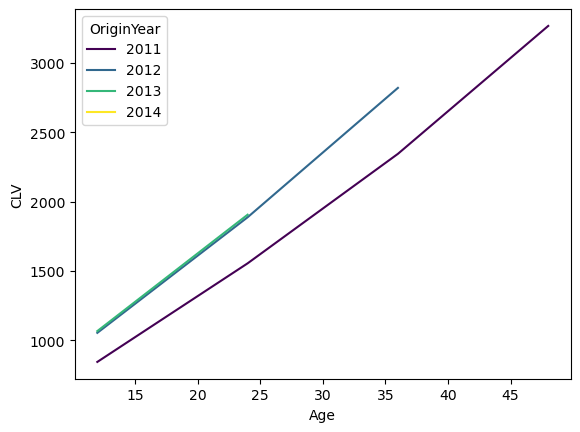

In [44]:
sns.lineplot(x = df_final_trans['Age'], y = df_final_trans['CLV'], hue = df_final_trans['OriginYear'], palette='viridis')

In [45]:
#Volume weighted average
# We take the average of each age group over all the years to arrive at the following.a
df_final_trans.groupby('Age')['CLV'].mean()

Age
12     954.700149
24    1783.570105
36    2583.343213
48    3267.985626
Name: CLV, dtype: float64

# Step 7: Interpreting your results (1)

In [46]:
# Interpret the historic CLV and briefly answer the following questions: -
# 1. How much have customers acquired in 2011 spent to date?
# Customers acquired in 2011 have spent 3267.985626 to date

# 2. Does each group of customers exhibit similar or different patterns of spending? What’s the implication for the business?
# Ans: What we can see from the analysis above is that retaining a 4 year old customer is beneficial then getting a new one.
# 2011 customers have higher CLV. 
# Hence, the business should focus on retaining the older customers

# Customers of all group show an increasing pattern of spending, so they are similar. 